```
    _/    _/  _/_/_/  _/       Numerical Simulation Laboratory
   _/_/  _/ _/       _/       Physics Department
  _/  _/_/    _/    _/       Universita' degli Studi di Milano
 _/    _/       _/ _/       Prof. D.E. Galli
_/    _/  _/_/_/  _/_/_/_/ email: Davide.Galli@unimi.it
```

# Lesson 8

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value_multidim(data):
    total = 0.
    total2 = 0.
    y = np.zeros(data[..., 0].shape + (2,))
    for i in range(data.shape[-1]):
        total = total + data[..., i]
        total2 = total2 + data[..., i]*data[..., i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[..., 0] = ave
        y[..., 1] = error(ave, ave2, i)
    return y

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

## Exercise 8.1

In this exercise, we estimate the energy of the ground state of the function $\psi(x) \propto \exp(-\frac{x-0.5}{2}) + \exp(-\frac{x+0.5}{2})$ in the potential $V(x) = x^4 - \frac 52 x^2$.

In [3]:
data = np.loadtxt("data/8.1-data.dat")
with open("data/8.1-info.dat") as file:
    N_blocks = int(file.readline())
    N_throws_per_block = int(file.readline())
H = blocks_value(data)

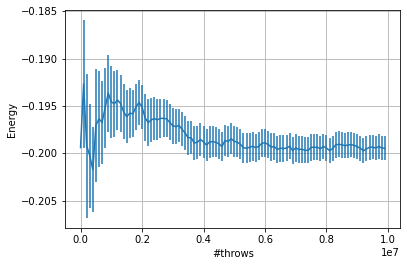

Ground state energy: -0.1995 ± 0.0013


In [4]:
x = np.arange(N_blocks) * N_throws_per_block
plt.grid(True)
plt.errorbar(x, H[:, 0], yerr=H[:, 1]);
plt.xlabel("#throws")
plt.ylabel("Energy")
plt.show()
print(f"Ground state energy: {H[-1, 0]:.4f} ± {H[-1, 1]:.4f}")

# Exercise 8.2

In this exercise, we estimate the parameters $\mu$ and $\sigma$ for which $\psi_{\mu, \sigma}(x) \propto \exp(-\frac{x-\mu}{2\sigma}) + \exp(-\frac{x+\mu}{2\sigma})$ has the minimum ground state energy, and calculate said energy using block mean.

In [5]:
data = np.loadtxt("data/8.2-data.dat")
with open("data/8.2-info.dat") as file:
    N_grid = int(file.readline())
    N_blocks = int(file.readline())
    N_throws_per_block = int(file.readline())
    N_fine_throws_per_block = int(file.readline())
    start = float(file.readline())
    step = float(file.readline())
stop = start + step * N_grid
data = blocks_value_multidim(data.reshape((N_grid, N_grid, N_blocks)))

To find the minimum energy, we plot the energy values for different $\mu$ and $\sigma$ in the interval $[0.5, 1)$.

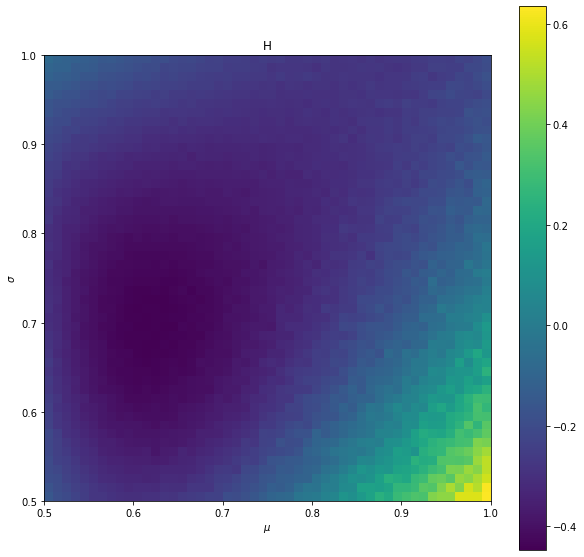

Minumum energy parameters: mu = 0.83	sigma = 0.61
Minimum energy: -0.447 ± 0.002


In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(data[..., 0], interpolation='nearest', extent=(start, stop, start, stop));
plt.colorbar()
plt.title("H")
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.show()
mins = np.unravel_index(data[..., 0].argmin(), data[..., 0].shape)
print(f"Minumum energy parameters: mu = {start+mins[0]*step:.2f}\tsigma = {start+mins[1]*step:.2f}\nMinimum energy: {data[mins[0], mins[1], 0]:.3f} ± {data[mins[0], mins[1], 1]:.3f}")

Using the parameters that minimize the energy that we have just found, we perform a new simulation using ten times the throws per block, to achieve a better accuracy in the energy measurement.

In [7]:
H = blocks_value(np.loadtxt("data/8.2-H.dat"))
sample = np.loadtxt("data/8.2-sample.dat")

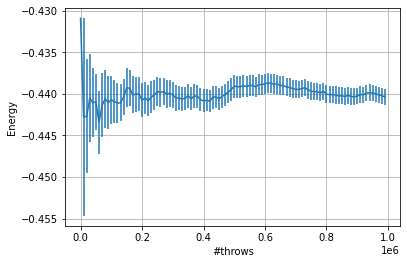

H = -0.4403 ± 0.0010


In [8]:
x = np.arange(N_blocks) * N_fine_throws_per_block
plt.grid(True)
plt.errorbar(x, H[:, 0], yerr=H[:, 1]);
plt.xlabel("#throws")
plt.ylabel("Energy")
plt.show()
print(f"H = {H[-1, 0]:.4f} ± {H[-1, 1]:.4f}")

We also sample the wavefunction (using the Metropolis technique), and compare it with the numerically calculated eigenvalues.

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198


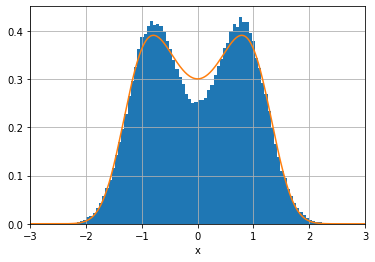

In [9]:
plt.hist(sample, bins=100, density=True);
x = np.linspace(-3, 3, 10000)

def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
scale = 0.3
plt.plot(x,(psi[0])**2)
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.show()

## Exercise 8.3

In this exercise, we use the PIGS algorithm to sample a trial wavefunction $\psi(x) = 1$ and the $\psi_{\mu, \sigma}(x)$ we sampled above, in the same potential as the previous exercises.

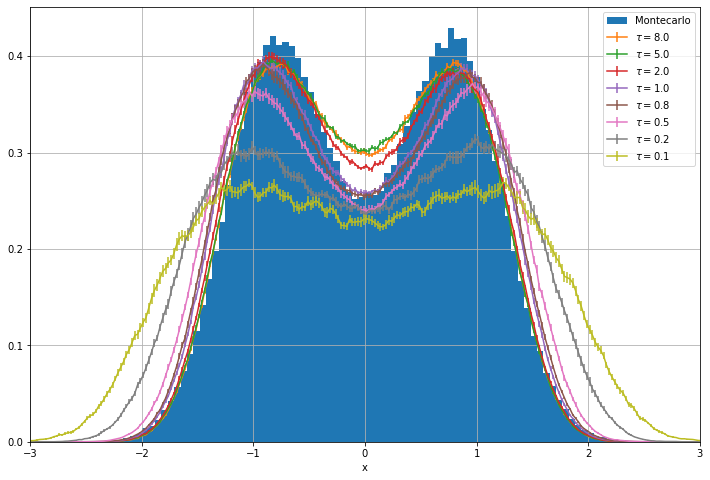

In [10]:
plt.figure(figsize=(12, 8))

plt.hist(sample, bins=100, density=True, label="Montecarlo");
for tau in (8., 5., 2., 1., 0.8, 0.5, 0.2, 0.1):
    trial_pigs_prob = np.loadtxt(f"data/8.3-trial-pigs-{tau}-probability.dat")
    plt.errorbar(trial_pigs_prob[:,0], trial_pigs_prob[:,1], yerr=trial_pigs_prob[:,2], label=f"$\\tau = {tau}$");
plt.legend()
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.show()

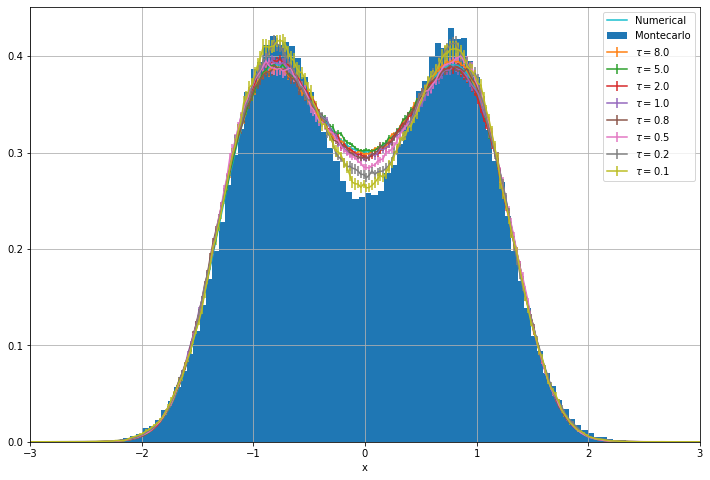

In [11]:
psi_pigs_prob = []
plt.figure(figsize=(12, 8))

plt.hist(sample, bins=100, density=True, label="Montecarlo");
for tau in (8., 5., 2., 1., 0.8, 0.5, 0.2, 0.1):
    psi_pigs_prob = np.loadtxt(f"data/8.3-psi-pigs-{tau}-probability.dat")
    plt.errorbar(psi_pigs_prob[:,0], psi_pigs_prob[:,1], yerr=psi_pigs_prob[:,2], label=f"$\\tau = {tau}$");

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
#plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x,(psi[0])**2, label="Numerical")
plt.legend()
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))

plt.show()

We observe that for the trial wavefunction we cannot reduce the imaginary time propagation to less than $\sim 1$, while with the optimized wavefunction $\psi_{\mu, \sigma}$ we can go one order of magnitude lower.

Finally, we use the PIMC algorithm to sample $\psi_{\mu, \sigma}$ at different temperatures.

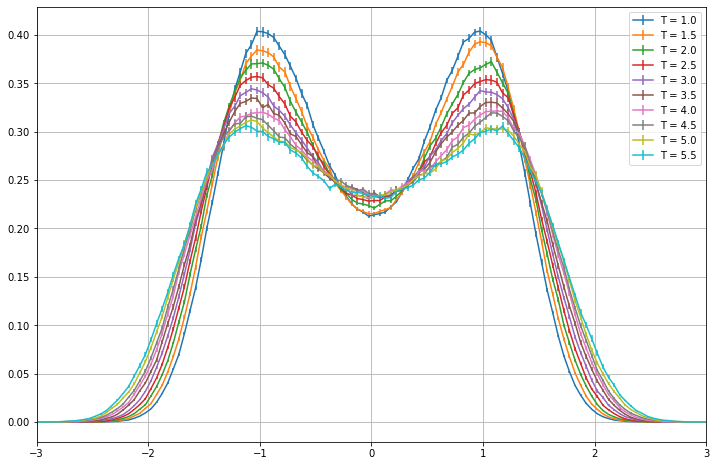

In [12]:
plt.figure(figsize=(12, 8))
for i in range(10):
    temperature = 1. + i * 0.5
    psi_pimc_prob = np.loadtxt(f"data/8.3-psi-pimc-{temperature:.1f}-probability.dat")
    plt.errorbar(psi_pimc_prob[:, 0], psi_pimc_prob[:, 1], yerr=psi_pimc_prob[:, 2], label=f"T = {temperature}")

plt.grid()
plt.legend()
plt.xlim((-3,3))
plt.show()